# Import Lib

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt

# Read Data

In [2]:
raw=pd.read_csv('Data/demand_hist_prod.csv')
raw.head()

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
0,Product_0993,Whse_J,Category_028,2012/7/27,100
1,Product_0979,Whse_J,Category_028,2012/1/19,500
2,Product_0979,Whse_J,Category_028,2012/2/3,500
3,Product_0979,Whse_J,Category_028,2012/2/9,500
4,Product_0979,Whse_J,Category_028,2012/3/2,500


# Cleaning

## Date Column 

In [3]:
def strip_col(raw):
    d={}
    for col in raw.columns:
        d[col]=col.strip(' ')
    return d
raw.rename(strip_col(raw),axis=1,inplace=True)

In [4]:
raw.columns[:4]

Index(['Product_Code', 'Warehouse', 'Product_Category', 'Date'], dtype='object')

In [5]:
for col in raw.columns[:4]:
    raw[col]=raw[col].apply(lambda x :x.strip())

In [6]:
for col in raw.columns:
    print(raw[col].value_counts())

Product_Code
Product_1359    16936
Product_1295    10575
Product_1378     9770
Product_0620     9428
Product_1286     8888
                ...  
Product_1912        2
Product_1703        1
Product_0465        1
Product_2099        1
Product_0853        1
Name: count, Length: 2160, dtype: int64
Warehouse
Whse_J    764447
Whse_A    153574
Whse_S     88200
Whse_C     42354
Name: count, dtype: int64
Product_Category
Category_019    481099
Category_005    101671
Category_001     97787
Category_007     82402
Category_021     52011
Category_006     35577
Category_028     31302
Category_011     23208
Category_015     22954
Category_024     20885
Category_009     19738
Category_026     14803
Category_030     12997
Category_032      9296
Category_022      8657
Category_023      7899
Category_018      5239
Category_003      4189
Category_013      3743
Category_020      3490
Category_031      2280
Category_033      1849
Category_008      1560
Category_012      1147
Category_010       976
Category_

In [7]:
raw['Date'].unique()

array(['2012/7/27', '2012/1/19', '2012/2/3', ..., '2016/4/17',
       '2016/3/27', '2016/2/21'], dtype=object)

In [8]:
raw.loc[raw['Date']=='NA']

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
45460,Product_1461,Whse_A,Category_019,NA,10000
456373,Product_1636,Whse_A,Category_019,NA,100
456374,Product_1461,Whse_A,Category_019,NA,300
456375,Product_1464,Whse_A,Category_019,NA,300
456376,Product_1388,Whse_A,Category_019,NA,200
...,...,...,...,...,...
995790,Product_1464,Whse_A,Category_019,NA,(900)
995791,Product_1541,Whse_A,Category_019,NA,(200)
995792,Product_1388,Whse_A,Category_019,NA,(300)
995793,Product_1541,Whse_A,Category_019,NA,(300)


In [9]:
raw.loc[456365:456379]

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
456365,Product_0421,Whse_A,Category_019,2014/6/16,2000
456366,Product_0425,Whse_A,Category_019,2014/6/24,2500
456367,Product_0984,Whse_A,Category_028,2014/9/30,500
456368,Product_0984,Whse_A,Category_028,2014/10/28,500
456369,Product_0984,Whse_A,Category_028,2014/12/9,500
456370,Product_0427,Whse_A,Category_019,2014/10/3,5000
456371,Product_0427,Whse_A,Category_019,2014/12/12,10000
456372,Product_0427,Whse_A,Category_019,2014/12/23,10000
456373,Product_1636,Whse_A,Category_019,NA,100
456374,Product_1461,Whse_A,Category_019,NA,300


In [10]:
raw.drop(raw.loc[raw['Date']=='NA'].index,inplace=True)

In [11]:
raw['Date']=pd.to_datetime(raw['Date'],yearfirst=True)

In [12]:
raw=raw.set_index(['Date']).sort_index()

In [13]:
raw.head(20)

,Product_Code,Warehouse,Product_Category,Order_Demand
Date,,,,
2011-01-08,Product_0965,Whse_A,Category_006,2
2011-05-31,Product_1724,Whse_A,Category_003,108
2011-06-24,Product_1521,Whse_S,Category_019,85000
2011-06-24,Product_1521,Whse_S,Category_019,7000
2011-09-02,Product_1507,Whse_C,Category_019,1250
2011-09-27,Product_0608,Whse_C,Category_001,5
2011-09-27,Product_1933,Whse_C,Category_001,23
2011-09-30,Product_0875,Whse_C,Category_023,5450
2011-10-20,Product_0125,Whse_S,Category_011,(2)


## Order_Demand

In [14]:
raw['Order_Demand']=raw['Order_Demand'].apply(lambda x: x.strip('()'))

In [15]:
# checking for indiscripancy
for col in raw.columns:
    print(raw[col].value_counts())

Product_Code
Product_1359    16936
Product_1295    10575
Product_1378     9770
Product_0620     9428
Product_1286     8888
                ...  
Product_1698        2
Product_2099        1
Product_1703        1
Product_0465        1
Product_0853        1
Name: count, Length: 2160, dtype: int64
Warehouse
Whse_J    764447
Whse_A    142335
Whse_S     88200
Whse_C     42354
Name: count, dtype: int64
Product_Category
Category_019    470266
Category_005    101627
Category_001     97787
Category_007     82402
Category_021     52008
Category_006     35552
Category_028     31012
Category_011     23208
Category_015     22954
Category_024     20885
Category_009     19738
Category_026     14771
Category_030     12997
Category_032      9296
Category_022      8657
Category_023      7899
Category_018      5239
Category_003      4189
Category_013      3743
Category_020      3490
Category_031      2268
Category_033      1849
Category_008      1560
Category_012      1147
Category_010       976
Category_

In [16]:
raw['Order_Demand']=pd.to_numeric(raw['Order_Demand'])

# EDA

In [17]:
data=raw.copy()

In [18]:
data.tail(20)

,Product_Code,Warehouse,Product_Category,Order_Demand
Date,,,,
2017-01-06,Product_1316,Whse_J,Category_019,10000
2017-01-06,Product_1274,Whse_J,Category_019,20000
2017-01-06,Product_1453,Whse_J,Category_019,8000
2017-01-06,Product_1408,Whse_J,Category_019,1000
2017-01-06,Product_1316,Whse_J,Category_019,10000
2017-01-06,Product_1938,Whse_J,Category_001,20
2017-01-06,Product_0689,Whse_J,Category_011,300
2017-01-06,Product_0025,Whse_J,Category_005,400
2017-01-06,Product_0689,Whse_J,Category_011,200


In [19]:
(data['Product_Code']=='Product_1316').sum()

3167

In [20]:
data.shape

(1037336, 4)

In [21]:
data_pt=data.reset_index().pivot_table(index=['Date','Warehouse','Product_Category','Product_Code'],values=['Order_Demand'],aggfunc='sum')
data_pt=data_pt.reset_index().set_index(['Date'])

In [22]:
data_pt=data_pt['2012':'2016']

In [104]:
data_pt

,Warehouse,Product_Category,Product_Code,Order_Demand
Date,,,,
2012-01-01,Whse_S,Category_024,Product_2166,2
2012-01-02,Whse_A,Category_019,Product_1291,500
2012-01-02,Whse_S,Category_001,Product_0404,100
2012-01-02,Whse_S,Category_001,Product_0613,4
2012-01-02,Whse_S,Category_001,Product_0614,3
...,...,...,...,...
2016-12-30,Whse_S,Category_019,Product_1431,15000
2016-12-30,Whse_S,Category_019,Product_1479,15000
2016-12-30,Whse_S,Category_021,Product_0288,100


In [113]:
df.reset_index().pivot_table(index=['Date'],columns=['Product_Code'],values=['Order_Demand'],aggfunc='sum').droplevel(0,axis=1).resample('m').sum()

Product_Code,Product_0001,Product_0002,Product_0003,Product_0004,Product_0005,Product_0006,Product_0007,Product_0008,Product_0009,Product_0010,...,Product_2163,Product_2164,Product_2165,Product_2166,Product_2167,Product_2168,Product_2169,Product_2170,Product_2171,Product_2172
Date,,,,,,,,,,,,,,,,,,,,,
2012-01-31,9700.0,65000.0,400.0,300.0,0.0,0.0,2100.0,4500.0,200.0,600.0,...,101.0,4.0,115.0,137.0,3844.0,463.0,509.0,18.0,31.0,100.0
2012-02-29,13000.0,19000.0,1200.0,1000.0,0.0,0.0,4100.0,10000.0,900.0,700.0,...,40.0,181.0,293.0,219.0,4194.0,1048.0,272.0,22.0,40.0,0.0
2012-03-31,14100.0,85000.0,400.0,500.0,0.0,0.0,2900.0,16500.0,900.0,200.0,...,20.0,0.0,237.0,360.0,3052.0,750.0,445.0,50.0,46.0,100.0
2012-04-30,3300.0,59500.0,1700.0,0.0,0.0,0.0,2100.0,15000.0,700.0,0.0,...,49.0,0.0,182.0,504.0,4859.0,1182.0,665.0,0.0,47.0,500.0
2012-05-31,9300.0,203500.0,900.0,800.0,0.0,0.0,3400.0,3500.0,800.0,400.0,...,86.0,27.0,60.0,274.0,5348.0,326.0,475.0,30.0,63.0,0.0
2012-06-30,6400.0,100500.0,300.0,100.0,100.0,0.0,1600.0,3500.0,0.0,400.0,...,35.0,27.0,26.0,1095.0,3961.0,438.0,685.0,69.0,17.0,200.0
2012-07-31,10100.0,119000.0,500.0,500.0,0.0,0.0,2500.0,7500.0,1400.0,2500.0,...,147.0,22.0,111.0,209.0,5288.0,268.0,818.0,4.0,28.0,0.0
2012-08-31,9300.0,119000.0,1200.0,500.0,200.0,200.0,2100.0,9000.0,500.0,1500.0,...,8.0,30.0,88.0,241.0,3708.0,2542.0,454.0,101.0,14.0,0.0
2012-09-30,6700.0,67500.0,1400.0,100.0,0.0,100.0,3600.0,10500.0,100.0,200.0,...,69.0,83.0,176.0,497.0,2391.0,714.0,261.0,16.0,55.0,0.0


In [23]:
df_whseA_prod=data_pt[data_pt['Warehouse']=='Whse_A'].reset_index().pivot_table(index=['Date'],columns=['Product_Code'],values=['Order_Demand'],aggfunc='sum',fill_value=0)

In [24]:
df_whseA_prod

Order_Demand                                                      \
Product_Code Product_0001 Product_0020 Product_0031 Product_0075 Product_0078   
Date                                                                            
2012-01-02              0            0            0            0            0   
2012-01-03           1000         1000         1000            1            0   
2012-01-04            200          200            0            0          300   
2012-01-05              0            0            0            0            0   
2012-01-06              0         1200         1200            0            0   
...                   ...          ...          ...          ...          ...   
2016-12-20              0            0            0            0            0   
2016-12-21              0            0            0            0            0   
2016-12-22              0            0            0            0            0   
2016-12-23              0            0            0            0         2000   
2016-12-30              0            0            0            0            0   

                                                                               \
Product_Code Product_0081 Product_0091 Product_0097 Product_0119 Product_0120   
Date                                                                            
2012-01-02              0            0            0            0            0   
2012-01-03              0            0            0            0            0   
2012-01-04              0            0          800            0            0   
2012-01-05              0            0            0            0            0   
2012-01-06              0            0            0            0            0   
...                   ...          ...          ...          ...          ...   
2016-12-20              0            0            0            0            0   
2016-12-21              0            0            0            0           30   
2016-12-22              0            0            0            0            0   
2016-12-23              0            0            0            0            0   
2016-12-30              0            0            0            0            0   

              ...                                                      \
Product_Code  ... Product_2138 Product_2142 Product_2144 Product_2147   
Date          ...                                                       
2012-01-02    ...            0            0            0            0   
2012-01-03    ...          144            0            0            0   
2012-01-04    ...          350            0            0            0   
2012-01-05    ...            0            0            0            0   
2012-01-06    ...           20            0            0            0   
...           ...          ...          ...          ...          ...   
2016-12-20    ...            0            0            0            4   
2016-12-21    ...            0            0            0            0   
2016-12-22    ...            0            0            0            0   
2016-12-23    ...            0            0            0            0   
2016-12-30    ...            0            0            0            0   

                                                                               \
Product_Code Product_2164 Product_2165 Product_2166 Product_2167 Product_2168   
Date                                                                            
2012-01-02              0            0            0            0            0   
2012-01-03              0            0            0            0            0   
2012-01-04              0           10            0            0            0   
2012-01-05              0            0            0           17            0   
2012-01-06              0            0            6            3            0   
...                   ...          ...          ...          ...        

In [25]:
df_whseA_prod_month=df_whseA_prod.resample('m').sum()

In [58]:
df_whseA_prod_month.head(1)

Order_Demand                                                      \
Product_Code Product_0001 Product_0020 Product_0031 Product_0075 Product_0078   
Date                                                                            
2012-01-31           6400         3500        10100            3        10300   

                                                                               \
Product_Code Product_0081 Product_0091 Product_0097 Product_0119 Product_0120   
Date                                                                            
2012-01-31            500            0         8800            0          180   

              ...                                                      \
Product_Code  ... Product_2138 Product_2142 Product_2144 Product_2147   
Date          ...                                                       
2012-01-31    ...         2048            0          201            0   

                                                                               \
Product_Code Product_2164 Product_2165 Product_2166 Product_2167 Product_2168   
Date                                                                            
2012-01-31              4           10           47           79           20   

                           
Product_Code Product_2169  
Date                       
2012-01-31              8  

[1 rows x 427 columns]

In [103]:
df_whseA_prod_month.droplevel([0],axis=1).reset_index().set_index(['Date'])

DatetimeIndex(['2012-01-31', '2012-02-29', '2012-03-31', '2012-04-30',
               '2012-05-31', '2012-06-30', '2012-07-31', '2012-08-31',
               '2012-09-30', '2012-10-31', '2012-11-30', '2012-12-31',
               '2013-01-31', '2013-02-28', '2013-03-31', '2013-04-30',
               '2013-05-31', '2013-06-30', '2013-07-31', '2013-08-31',
               '2013-09-30', '2013-10-31', '2013-11-30', '2013-12-31',
               '2014-01-31', '2014-02-28', '2014-03-31', '2014-04-30',
               '2014-05-31', '2014-06-30', '2014-07-31', '2014-08-31',
               '2014-09-30', '2014-10-31', '2014-11-30', '2014-12-31',
               '2015-01-31', '2015-02-28', '2015-03-31', '2015-04-30',
               '2015-05-31', '2015-06-30', '2015-07-31', '2015-08-31',
               '2015-09-30', '2015-10-31', '2015-11-30', '2015-12-31',
               '2016-01-31', '2016-02-29', '2016-03-31', '2016-04-30',
               '2016-05-31', '2016-06-30', '2016-07-31', '2016-08-31',
      

In [26]:
from statsmodels.tsa.seasonal import seasonal_decompose
sd=seasonal_decompose(df_whseA_prod_month['Order_Demand']['Product_0001'])

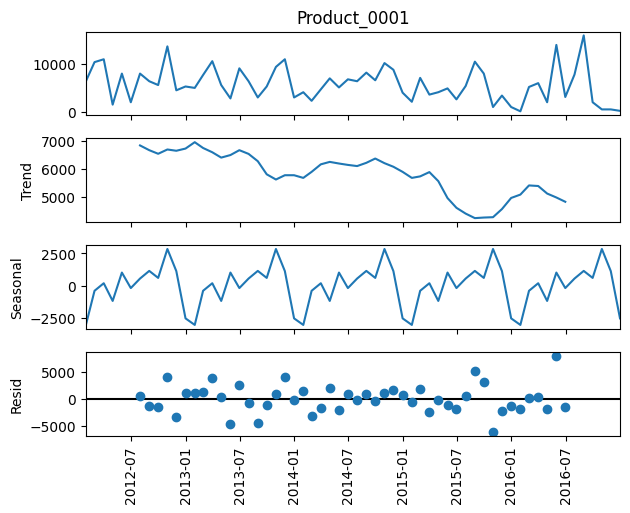

In [27]:
sd.plot()
plt.xticks(rotation=90)
plt.show()

In [28]:
px.line(df_whseA_prod_month['Order_Demand']['Product_0001'],y=sd.seasonal)

In [29]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

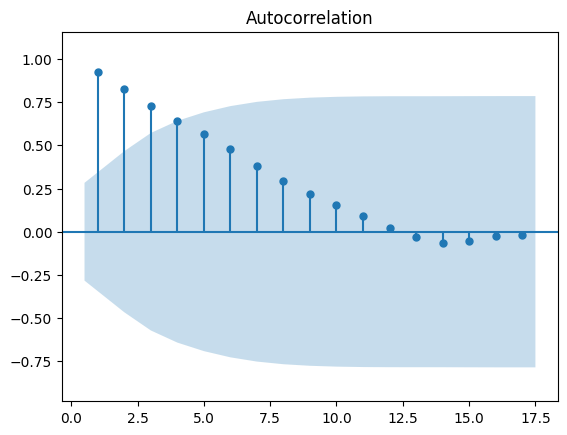

In [30]:
plot_acf(sd.trend.dropna(),zero=False,auto_ylims=True)
plt.show()

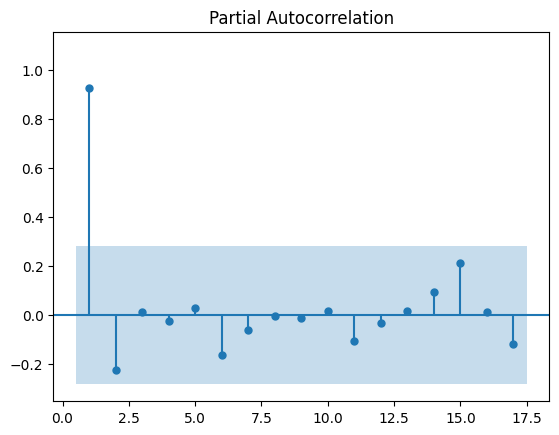

In [31]:
plot_pacf(sd.trend.dropna(),zero=False,auto_ylims=True)
plt.show()

In [32]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX


In [33]:
ARIMA(sd.trend.ffill(),order=(3,0,1)).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  trend   No. Observations:                   60
Model:                 ARIMA(3, 0, 1)   Log Likelihood                -348.889
Date:                Mon, 05 Feb 2024   AIC                            709.777
Time:                        16:37:35   BIC                            722.343
Sample:                    01-31-2012   HQIC                           714.693
                         - 12-31-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5697.2795    491.305     11.596      0.000    4734.339    6660.220
ar.L1          0.8829      0.145      6.095      0.000       0.599       1.167
ar.L2          0.1950      0.230      0.849      0.396      -0.255       0.645
ar.L3         -0.1402      0.177     -0.793      0.428      -0.487       0.206
ma.L1          0.9996      9.420      0.106      0.915     -17.463      19.462
sigma2        2.1e+04   1.97e+05      0.107      0.915   -3.65e+05    4.07e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):                 0.26
Prob(Q):                              0.79   Prob(JB):                         0.88
Heteroskedasticity (H):               1.02   Skew:                             0.04
Prob(H) (two-sided):                  0.97   Kurtosis:                         3.31
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [37]:
SARIMAX(df_whseA_prod_month['Order_Demand']['Product_0001'],order=(3,0,1),seasonal_order=(0,0,1,12)).fit().summary()

c:\Users\Linux\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                       Product_0001   No. Observations:                   60
Model:             SARIMAX(3, 0, 1)x(0, 0, 1, 12)   Log Likelihood                -576.469
Date:                            Mon, 05 Feb 2024   AIC                           1164.938
Time:                                    16:41:16   BIC                           1177.505
Sample:                                01-31-2012   HQIC                          1169.854
                                     - 12-31-2016                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5636      0.132     -4.276      0.000      -0.822      -0.305
ar.L2          0.6551      0.097      6.722      0.000       0.464       0.846
ar.L3          0.5226      0.121      4.309      0.000       0.285       0.760
ma.L1          0.9997      0.176      5.677      0.000       0.655       1.345
ma.S.L12       0.5136      0.196      2.623      0.009       0.130       0.897
sigma2      1.158e+07   1.52e-08   7.62e+14      0.000    1.16e+07    1.16e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.90   Jarque-Bera (JB):                 0.83
Prob(Q):                              0.34   Prob(JB):                         0.66
Heteroskedasticity (H):               1.53   Skew:                             0.28
Prob(H) (two-sided):                  0.35   Kurtosis:                         3.09
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.72e+29. Standard errors may be unstable.
"""

In [29]:
from pmdarima import auto_arima

In [31]:
aa=auto_arima(df2['Product_0001'])

In [36]:
aa.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   60
Model:                        SARIMAX   Log Likelihood                -575.851
Date:                Wed, 07 Feb 2024   AIC                           1155.701
Time:                        18:43:33   BIC                           1159.890
Sample:                    01-31-2012   HQIC                          1157.340
                         - 12-31-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   5783.3333    505.369     11.444      0.000    4792.828    6773.839
sigma2       1.27e+07   2.51e+06      5.058      0.000    7.78e+06    1.76e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.35   Jarque-Bera (JB):                 3.53
Prob(Q):                              0.55   Prob(JB):                         0.17
Heteroskedasticity (H):               1.99   Skew:                             0.59
Prob(H) (two-sided):                  0.13   Kurtosis:                         3.06
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [41]:
import pandas as pd

In [65]:
aa=auto_arima(df2['Product_0001'], start_p=1, start_q=1,
                      test='adf',
                      max_p=5, max_q=5,             
                      d=1,
                      m=12,         
                      seasonal=True,   
                      start_P=0, 
                      D=None, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=inf, Time=0.94 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1172.435, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1158.794, Time=0.11 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=inf, Time=0.58 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1170.471, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=1163.336, Time=0.03 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=1158.657, Time=0.20 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=1160.631, Time=0.34 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=1159.563, Time=0.16 sec
 ARIMA(0,1,0)(2,0,0)[12] intercept   : AIC=1173.686, Time=0.16 sec
 ARIMA(2,1,0)(2,0,0)[12] intercept   : AIC=1153.452, Time=0.33 sec
 ARIMA(2,1,0)(1,0,0)[12] intercept   : AIC=1152.844, Time=0.16 sec
 ARIMA(2,1,0)(0,0,0)[12] intercept   : AIC=1156.111, Time=0.11 sec
 ARIMA(2,1,0)(1,0,1)[12] intercept   : AIC=1153.947, Time=0.26 sec
 ARIMA(2,1,0)(0,0,1)[12] inte

In [67]:
df_pred=aa.predict(20)

<Axes: xlabel='Date'>

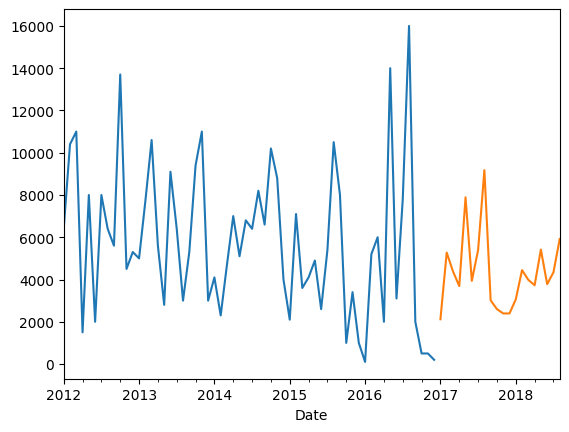

In [78]:
df2['Product_0001'].plot()
df_pred.plot()

In [60]:
temp=df2['Product_0001']
for i in range(10):
    aa=auto_arima(temp, start_p=1, start_q=1,
                      test='adf',
                      max_p=5, max_q=5,             
                      d=1,          
                      seasonal=True,   
                      start_P=0, 
                      D=None, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
    temp=pd.concat([temp,aa.predict(1)],axis=0)
temp.tail(12)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=inf, Time=1.30 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1172.435, Time=0.05 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1158.794, Time=0.13 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=inf, Time=0.67 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1170.471, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=1163.336, Time=0.04 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=1158.657, Time=0.24 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=1160.631, Time=0.35 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=1159.563, Time=0.16 sec
 ARIMA(0,1,0)(2,0,0)[12] intercept   : AIC=1173.686, Time=0.17 sec
 ARIMA(2,1,0)(2,0,0)[12] intercept   : AIC=1153.452, Time=0.33 sec
 ARIMA(2,1,0)(1,0,0)[12] intercept   : AIC=1152.844, Time=0.16 sec
 ARIMA(2,1,0)(0,0,0)[12] intercept   : AIC=1156.111, Time=0.05 sec
 ARIMA(2,1,0)(1,0,1)[12] intercept   : AIC=1153.947, Time=0.23 sec
 ARIMA(2,1,0)(0,0,1)[12] inte

2016-11-30     500.000000
2016-12-31     200.000000
2017-01-31    2118.835742
2017-02-28    4797.790122
2017-03-31    4659.066850
2017-04-30    3616.868424
2017-05-31    9323.107505
2017-06-30    4556.035046
2017-07-31    4857.040642
2017-08-31    9040.505190
2017-09-30    2812.205739
2017-10-31    1222.950462
dtype: float64

In [52]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [48]:
df2.tail()

Product_Code,Product_0001,Product_0020,Product_0031,Product_0075,Product_0078,Product_0081,Product_0091,Product_0097,Product_0119,Product_0120,...,Product_2138,Product_2142,Product_2144,Product_2147,Product_2164,Product_2165,Product_2166,Product_2167,Product_2168,Product_2169
Date,,,,,,,,,,,,,,,,,,,,,
2016-08-31,16000.0,2100,1400,1,4600,2000,1400,7000,120,2840,...,190,46,8,10,20,0,29,537,58,20
2016-09-30,2000.0,4900,2800,2,0,2300,500,6100,4,1860,...,88,0,20,0,0,0,54,239,0,25
2016-10-31,500.0,2100,2400,0,4800,3200,500,2500,27,100,...,626,21,165,0,7,2,70,290,43,33
2016-11-30,500.0,3400,4000,0,1300,1000,500,5000,125,1430,...,330,0,107,0,25,6,39,409,99,24
2016-12-31,200.0,200,2600,2,2800,2000,1050,0,20,1770,...,88,0,25,6,4,7,17,137,2,6


In [2]:
from Deploy.ingest import read_data
from Deploy.clean import clean_data
from Deploy.wh_data import get_wh_data

df=clean_data(read_data('Data/demand_hist_prod.csv'))


Product_Code,Product_0001,Product_0020,Product_0031,Product_0075,Product_0078
Date,,,,,
2012-01-31,6400,3500,10100,3,10300
2012-02-29,10400,6000,6400,1,1700
2012-03-31,11000,800,3000,0,4000
2012-04-30,1500,6800,5400,0,300
2012-05-31,8000,5900,3500,0,1300


In [5]:
df2=get_wh_data(df,'Whse_A')

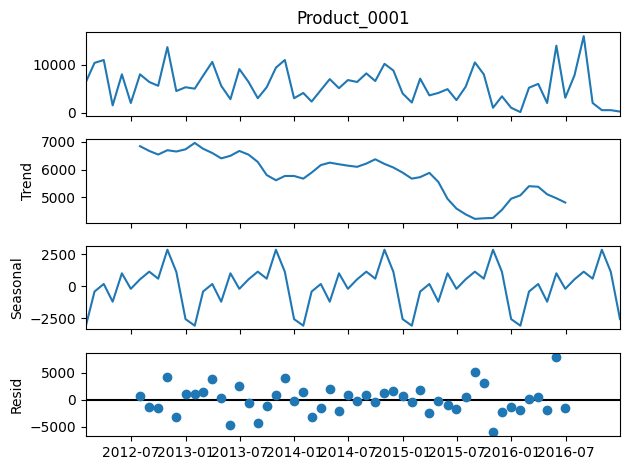

In [6]:
from statsmodels.tsa.seasonal import seasonal_decompose
sd=seasonal_decompose(df2['Product_0001'])

In [24]:
temp=df[df['Warehouse']=='Whse_A'].drop(['Warehouse', 'Product_Category'],axis=1).groupby('Product_Code').agg('sum').sort_values(by='Order_Demand',ascending=False)
temp.index

Index(['Product_1496', 'Product_1470', 'Product_1388', 'Product_0424',
       'Product_1513', 'Product_1410', 'Product_1299', 'Product_0979',
       'Product_1825', 'Product_0982',
       ...
       'Product_0467', 'Product_0647', 'Product_1773', 'Product_0466',
       'Product_1793', 'Product_1168', 'Product_0638', 'Product_0465',
       'Product_1698', 'Product_1703'],
      dtype='object', name='Product_Code', length=427)

In [25]:
temp

,Order_Demand
Product_Code,
Product_1496,10474750
Product_1470,9343800
Product_1388,7671900
Product_0424,6180000
Product_1513,5945800
...,...
Product_1168,23
Product_0638,22
Product_0465,3


In [15]:
import plotly.express as px

In [26]:
px.bar(temp)